In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string
from nltk.corpus import stopwords
import matplotlib.dates as mdates
# Import the langdetect library
from langdetect import detect
import numpy as np
import re
import matplotlib.font_manager as fm


In [3]:


# Replace 'file.csv' with the path to your CSV file
df = pd.read_csv('Master_Dataset_Raw_copy.csv')
# Sort the DataFrame by the datetime column in ascending order
df_sorted = df.sort_values(by='Account Created Date')

# Print the sorted DataFrame
df_sorted

# set the display option to show the full text in a column
pd.set_option('display.max_colwidth', 150)

df_sorted.tail(20)

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Interest
32881,122523,STY1659791147,65489,USR1659282400,NaN,25,Friendship goals,Bhawna you and mee doing all the gupshup 🤪🤪🤪,https://image.pixstory.com/Pixstory-image-165979101660381.png,31-07-2022 21:16,friendshipday22
30959,124502,STY1660157654,65494,USR1659282630,NaN,22,Scenery,Daylight,https://image.pixstory.com/Pixstory-image-166015759263065.png,31-07-2022 21:20,scenic view
30961,124500,STY1660157548,65494,USR1659282630,NaN,22,Animals,"If i was a blue bird, i would fly to you",https://image.pixstory.com/Pixstory-image-16601574965385.png,31-07-2022 21:20,bird
30963,124498,STY1660157463,65494,USR1659282630,NaN,22,Scenic view,I know places,https://image.pixstory.com/Pixstory-image-166015730330804.png,31-07-2022 21:20,scenery
30966,124495,STY1660157248,65494,USR1659282630,NaN,22,Nature,Green Day,https://image.pixstory.com/Pixstory-image-16601571627425.png,31-07-2022 21:20,nature
30969,124492,STY1660157104,65494,USR1659282630,NaN,22,Monsoon,Rainy days with pakodas are best,https://image.pixstory.com/Pixstory-image-166015701854868.png,31-07-2022 21:20,monsoonvibes
33870,121522,STY1659511003,65603,USR1659288090,NaN,32,Mother’s milk: What should the mother eat,"Mother’s milk, often called as the superfood for babies, is one of the best gifts a mother can give to her child. Breast milk provides abundant nu...",https://image.pixstory.com/Pixstory-image-165951059617521.jpeg,31-07-2022 22:51,"breastfeeding, Health, mothers, diet"
31196,124262,STY1660128113,8597,USR1630411469,male,38,The Housemaid (1960) – an unparalleled classic in Korean revenge dramas,An unbearable household created by a housemaid after her entry into Kim Dong-sik’s (Kim Jin-kyu) urban house – this could be the modest one-liner ...,https://image.pixstory.com/Pixstory-image-16601275079765.jpeg,31-08-2021 17:34,"Entertainment, the housemaid (1960), kim ki-youn, im sang-soo, top rated korean black and white movies"
34149,121236,STY1659435797,8597,USR1630411469,male,38,Why I binge-watch Masaba Masaba –Netflix’s popular desi show,"When I binge-watched season 1 during the lockdown, Neena Gupta was the star. Mom’s character stood out compared to a debutant Masaba. But Masaba i...",https://image.pixstory.com/Pixstory-image-165943477224351.jpeg,31-08-2021 17:34,"masaba, Entertainment, neena gupta, indian series, masaba masaba review"
27544,128054,STY1660726673,8597,USR1630411469,male,38,Darlings – daughters are not meant to be sent off..,Darlings has scored a fair share of compliments from movie buffs. What amused me while watching this movie is the bold protection a mother gives t...,https://image.pixstory.com/Pixstory-image-166072546849928.jpeg,31-08-2021 17:34,"Entertainment, darlings, bollywood movies, alia bhatt, shefali shah, dark humour genre"


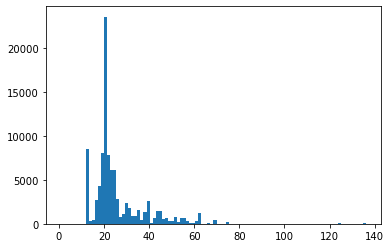

In [9]:
# create a histogram of one of the columns

plt.hist(df['Age'], bins=100)
plt.show()

# Top Interests from Pixstory

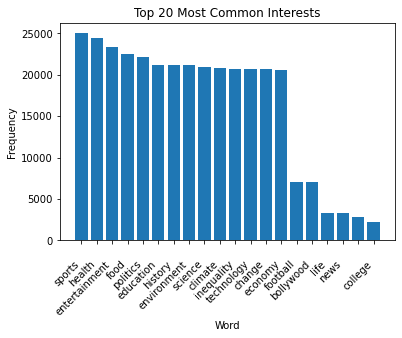

In [25]:

text = df['Interest'].str.cat(sep=' ')


# Convert the text to lowercase and split it into words
words = text.lower().split()

# Define the set of punctuation marks to exclude from the words
exclude = set(string.punctuation)

# Define the stop words to exclude from the frequency counter
stop_words = ['the', 'is', 'not', 'so', 'after', 'all']

# Remove the stop words from the list of words
words = [word for word in words if word not in stop_words]

# Remove the punctuation marks from each word
words = [''.join(ch for ch in word if ch not in exclude) for word in words]

# Calculate the frequencies of each word and keep the top 10
top_words = Counter(words).most_common(20)

# Extract the word and frequency values into separate lists
word_values = [pair[0] for pair in top_words]
frequency_values = [pair[1] for pair in top_words]

# Create a histogram of the word frequencies
fig, ax = plt.subplots()
ax.bar(word_values, frequency_values, align='center')
ax.set_xticks(word_values)
ax.set_xticklabels(word_values, rotation=45, ha='right')
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Common Interests')
plt.show()

# Top word Pairs given interests

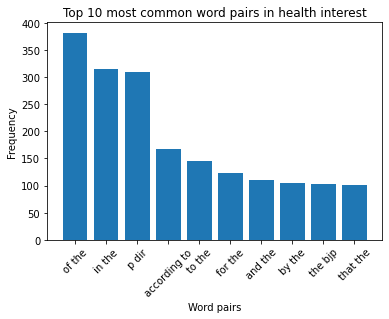

In [43]:


# filter for rows containing the word "India" in the Interest column
india_df = df[df['Interest'].str.contains("politics")]

# create a list of all 2-word strings in the Title column
title_words = []
for title in india_df['Narrative']:
    title_words.extend([word for word in re.findall(r'\b\w+\s\w+\b', title.lower())])

# count the frequency of each 2-word string
title_counts = Counter(title_words)

# get the top 10 most common 2-word strings
top_words = title_counts.most_common(10)

# create lists of the words and their counts
word_list = [word[0] for word in top_words]
count_list = [word[1] for word in top_words]

# create a bar chart of the word counts
plt.bar(word_list, count_list)

# add labels and title
plt.xlabel('Word pairs')
plt.ylabel('Frequency')
plt.title('Top 10 most common word pairs in health interest')

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
# show the plot
plt.show()



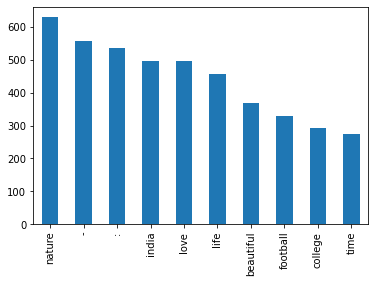

In [8]:

# Filter the data to only include rows where "sports" appears in column y
sports_df = df[df['Interest'].str.contains('sports', case=False)]


# Combine all of the text in column x into a single string
text = ' '.join(sports_df['Title'].tolist())

# Convert the text to lowercase and split it into words
words = text.lower().split()


# Define the stop words to exclude from the frequency counter
stop_words = ['the', 'is', 'not', 'so', 'after', 'all', 'of', 'to', 'in', 'a', 'i', 'my', 'with', 'at', 'for', 'and', 'on', 'you', 'this','are','from','as', 'be', 'it','new','by','sports', 'your','will','day','that','what','has','good','how','world','cup','can','we','2022','an','have','was','best','about','his','one','le','first']

# Remove the stop words from the list of words
words = [word for word in words if word not in stop_words]

# Split the text into individual words and count the frequency of each word
word_counts = pd.Series(words).value_counts()

# Plot the top ten most frequent words
word_counts.head(10).plot(kind='bar')
plt.show()





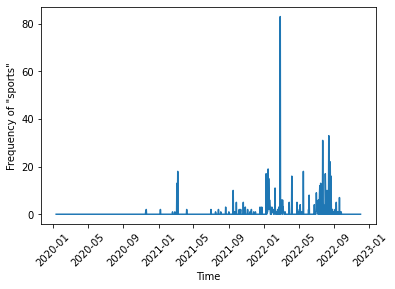

In [54]:
# Convert the "time" column to a datetime format
df['Account Created Date'] = pd.to_datetime(df['Account Created Date'])

# Group the data by time intervals and count the frequency of the word "sports"
freq_df = df[df['Interest'].str.contains('sports', case=False)].groupby(pd.Grouper(key='Account Created Date', freq='D')).apply(lambda x: x['Interest'].str.count('sports').sum())

# Create a plot of the frequency of the word "sports" over time
fig, ax = plt.subplots()
ax.plot(freq_df.index, freq_df.values)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency of "sports"')


# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

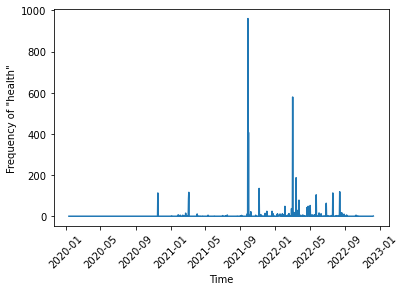

In [55]:
# Convert the "time" column to a datetime format
df['Account Created Date'] = pd.to_datetime(df['Account Created Date'])

# Group the data by time intervals and count the frequency of the word "sports"
freq_df = df[df['Interest'].str.contains('health', case=False)].groupby(pd.Grouper(key='Account Created Date', freq='D')).apply(lambda x: x['Interest'].str.count('health').sum())

# Create a plot of the frequency of the word "sports" over time
fig, ax = plt.subplots()
ax.plot(freq_df.index, freq_df.values)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency of "health"')


# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

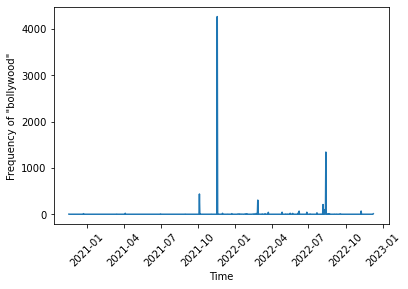

In [102]:
# Convert the "time" column to a datetime format
df['Account Created Date'] = pd.to_datetime(df['Account Created Date'])

# Group the data by time intervals and count the frequency of the word "sports"
freq_df = df[df['Interest'].str.contains('bollywood', case=False)].groupby(pd.Grouper(key='Account Created Date', freq='D')).apply(lambda x: x['Interest'].str.count('bollywood').sum())

# Create a plot of the frequency of the word "sports" over time
fig, ax = plt.subplots()
ax.plot(freq_df.index, freq_df.values)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency of "bollywood"')


# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

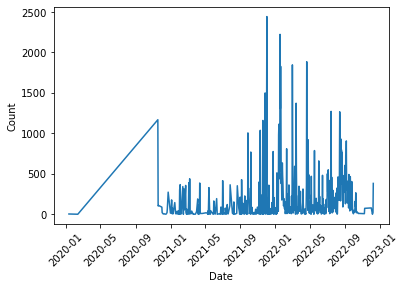

In [100]:
# convert datetime column to just show the date and assign to 'date' column
df['date'] = pd.to_datetime(df['Account Created Date']).dt.date

# sort by increasing date
df_sorted = df.sort_values('date')

# create new data frame with unique dates and count of occurrences
df2 = df_sorted.groupby('date').size().reset_index(name='count')

# print result
df2

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot date vs count as a line graph
ax.plot(df2['date'], df2['count'])

# Set x-axis label and rotate tick labels
ax.set_xlabel('Date')
plt.xticks(rotation=45)

# Set y-axis label
ax.set_ylabel('Count')

# Show the plot
plt.show()


